In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Author: Het Patel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "http://bit.ly/w-data"
df = pd.read_csv(path)


In [2]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Let's plot the data.

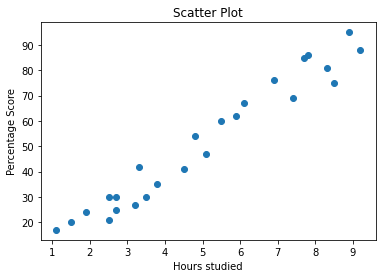

In [4]:
plt.scatter(x=df['Hours'], y=df['Scores'])
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.title("Scatter Plot")
plt.show()

We can see the linear relation between the 2 variables. Hence, Linear regression should be used.

### Data preparation:

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### Splitting data into training and test sets:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training:

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

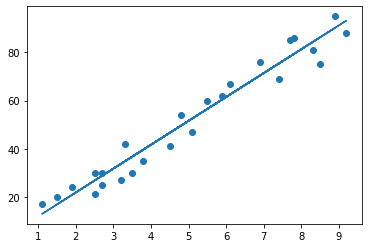

In [8]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Predictions:

In [9]:
y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/ day?

In [10]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of Hours: {}".format(hours))
print("Predicted Score: {}".format(own_pred[0]))

Number of Hours: 9.25
Predicted Score: 93.69173248737535


### Evaluation of the Model:

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
